### 1. 导入完成主成分分析和聚类所需要的包

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from A06_PCA import DimensionReduce, show_scree_plot, show_correlation_plot
from A07_KMeans import Clustering
from A06_StandardScaler import Standard
from ShowClusterScatter import show_class_result
from ShowSilhouette import show_silhouette_plot
import warnings
import joblib

warnings.filterwarnings('ignore')

plt.rc('font', family='Times New Roman')


### 2. 读取加速、减速事件数据内容

In [23]:
acc_data = pd.read_csv(
    '../GpsData/BasicData/加速制动事件/gps加速事件提取附加车辆信息.csv')
# 提取重型货车数据
acc_data = acc_data[(acc_data['car_type'] == '重型货车')].reset_index(drop=True)
acc_data = acc_data[acc_data['max_acc_lon'] < 5].reset_index(drop=True)
acc_data['logo'] = '加速事件'


In [24]:
dec_data = pd.read_csv(
    '../GpsData/BasicData/加速制动事件/gps制动事件提取附加车辆信息.csv')
# 提取重型货车数据
dec_data = dec_data[(dec_data['car_type'] == '重型货车')].reset_index(drop=True)
dec_data = dec_data[dec_data['max_dec_lon'] < 5].reset_index(drop=True)
dec_data['logo'] = '刹车事件'


### 3. 分别对加速、减速事件的原始特征进行标准化，并保存为scaler_indicator

In [25]:
# 加速事件原始特征列
acc_index_cols = ['max_v', 'mean_v', 'std_v', 'min_v',
                  'max_acc_lon', 'mean_acc_lon', 'std_acc_lon',
                  'max_jerk', 'mean_jerk', 'std_jerk', 'duration']
# 加速事件原始特征zscore标准化
acc_ss = Standard(acc_data[acc_index_cols])
ss_acc_index = acc_ss.out_scaled_result()


In [26]:
# 减速事件原始特征列
dec_index_cols = ['max_v', 'mean_v', 'std_v', 'min_v',
                  'max_dec_lon', 'mean_dec_lon', 'std_dec_lon',
                  'max_jerk', 'mean_jerk', 'std_jerk', 'duration']
# 加速事件原始特征zscore标准化
dec_ss = Standard(dec_data[dec_index_cols])
ss_dec_index = dec_ss.out_scaled_result()


### 4. 对标准化后的原始特征变量通过主成分分析进行降维


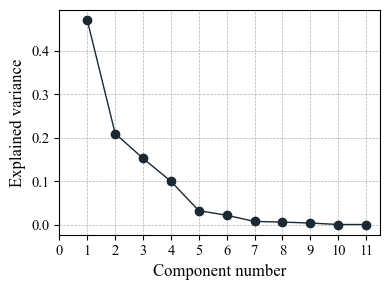

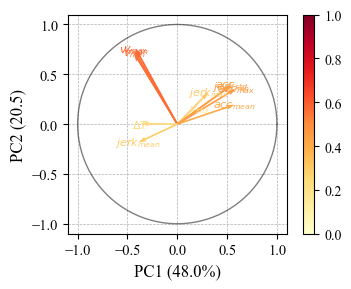

In [27]:
# 创建加速事件PCA降维类
acc_dr = DimensionReduce(ss_acc_index)
acc_tve = acc_dr.calc_total_variance_explain()
acc_tve.to_excel(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsData/主成分分析结果/加速事件_主成分总解释方差.xlsx', index=False)

acc_pc_load = acc_dr.calc_PC_loadings()
acc_pc_load.to_excel(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsData/主成分分析结果/加速事件_主成分载荷.xlsx', index=True)

acc_rc_load = acc_dr.calc_RC_loadings()
acc_rc_load.to_excel(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsData/主成分分析结果/加速事件_主成分旋转载荷.xlsx', index=True)

show_scree_plot(acc_tve)
plt.savefig(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsFigure/主成分分析结果/加速事件_主成分碎石图.pdf')

acc_labels = [r'$v_{max}$', r'$v_{mean}$', r'$v_{std}$', r'$v_{min}$',
              r'$acc_{max}$', r'$acc_{mean}$', r'$acc_{std}$',
              r'$jerk_{max}$', r'$jerk_{mean}$', r'$jerk_{min}$', r'$\Delta T$']
show_correlation_plot(acc_pc_load, x_cols=[
                      'PC1', 'PC2'], text_labels=acc_labels, xy_labels=['PC1 (48.0%)', 'PC2 (20.5)'])
plt.savefig(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsFigure/主成分分析结果/加速事件_原始特征与主成分相关关系图.pdf')


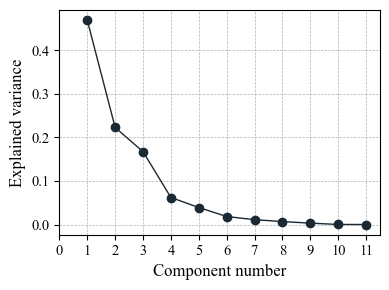

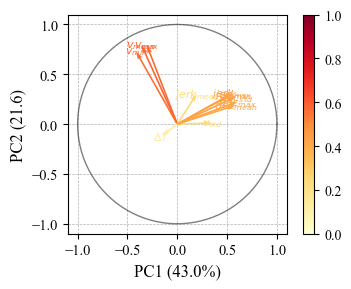

In [28]:
# 创建减速事件PCA降维类
dec_dr = DimensionReduce(ss_dec_index)
dec_tve = dec_dr.calc_total_variance_explain()
dec_tve.to_excel(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsData/主成分分析结果/刹车事件_主成分总解释方差.xlsx', index=False)

dec_pc_load = dec_dr.calc_PC_loadings()
dec_pc_load.to_excel(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsData/主成分分析结果/刹车事件_主成分载荷.xlsx', index=True)

dec_rc_load = dec_dr.calc_RC_loadings()
dec_rc_load.to_excel(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsData/主成分分析结果/刹车事件_主成分旋转载荷.xlsx', index=True)

show_scree_plot(dec_tve)
plt.savefig(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsFigure/主成分分析结果/刹车事件_主成分碎石图.pdf')

dec_labels = [r'$v_{max}$', r'$v_{mean}$', r'$v_{std}$', r'$v_{min}$',
              r'$dec_{max}$', r'$dec_{mean}$', r'$dec_{std}$',
              r'$jerk_{max}$', r'$jerk_{mean}$', r'$jerk_{min}$', r'$\Delta T$']
show_correlation_plot(dec_pc_load, x_cols=[
                      'PC1', 'PC2'], text_labels=dec_labels, xy_labels=['PC1 (43.0%)', 'PC2 (21.6)'])
plt.savefig(
    '/Users/zhangjianhua/Desktop/明觉数据分析/GpsFigure/主成分分析结果/刹车事件_原始特征与主成分相关关系图.pdf')
